In [3]:

import pandas as pd  # Data handling
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Scaling features
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier  # KNN model
from sklearn.naive_bayes import CategoricalNB  # Naive Bayes model
from sklearn.neural_network import MLPClassifier  # Neural Network model
from sklearn.cluster import KMeans, DBSCAN  # Clustering models
from sklearn.naive_bayes import GaussianNB  # For continuous features
from sklearn.naive_bayes import MultinomialNB # For discrete features
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [4]:
train_data = pd.read_csv("/content/mnist_train.csv")
test_data = pd.read_csv("/content/mnist_test.csv")

train_data.head()


0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0  0  0  0  0  0  0  0  0  0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   783  label  
0  0.0    5.0  
1  0.0    0.0  
2  0.0    4.0  
3  0.0    1.0  
4  0.0    9.0  

[5 rows x 785 columns]

In [5]:
# Feature/Target Separation
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

# Data Type Check and Conversion
if not pd.api.types.is_numeric_dtype(X_train.values.dtype):
    X_train = X_train.astype('float64')
if not pd.api.types.is_numeric_dtype(X_test.values.dtype):
    X_test = X_test.astype('float64')

print(X_train.dtypes)
print(X_test.dtypes)

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
779    float64
780    float64
781    float64
782    float64
783    float64
Length: 784, dtype: object
0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
779    float64
780    float64
781    float64
782    float64
783    float64
Length: 784, dtype: object


In [6]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("X_train_split shape:", X_train_split.shape)
print("X_val shape:", X_val.shape)
print("y_train_split shape:", y_train_split.shape)
print("y_val shape:", y_val.shape)

X_train_split shape: (920, 784)
X_val shape: (231, 784)
y_train_split shape: (920,)
y_val shape: (231,)


In [7]:
# Filter ConvergenceWarning to avoid excessive warnings during training
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming X and y are already loaded
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42  # 80% training, 20% testing
)

# Handle missing values by imputing (replacing NaNs with the column mean)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_split)
X_test_imputed = imputer.transform(X_test_split)

# Create a new imputer for y with 'most_frequent' strategy
imputer_y = SimpleImputer(strategy='most_frequent')
# Reshape y_train_split to a 2D array for imputation
y_train_split_reshaped = y_train_split.values.reshape(-1, 1)
# Impute missing values in y_train_split
y_train_imputed = imputer_y.fit_transform(y_train_split_reshaped)
# Reshape y_train_imputed back to a 1D array
y_train_imputed = y_train_imputed.ravel()

# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()


# Train the models
models = {}

try:
    rf_model.fit(X_train_imputed, y_train_imputed)
    models['RandomForestClassifier'] = rf_model
    print("Random Forest trained successfully.")
except Exception as e:
    print(f"Error training Random Forest: {e}")

try:
    mlp_model.fit(X_train_imputed, y_train_imputed)
    models['MLPClassifier'] = mlp_model
    print("MLP trained successfully.")
except Exception as e:
    print(f"Error training MLP: {e}")

try:
    knn_model.fit(X_train_imputed, y_train_imputed)
    models['KNeighborsClassifier'] = knn_model
    print("KNN trained successfully.")
except Exception as e:
    print(f"Error training KNN: {e}")

try:
    nb_model.fit(X_train_imputed, y_train_imputed)
    models['GaussianNB'] = nb_model
    print("Naive Bayes trained successfully.")
except Exception as e:
    print(f"Error training Naive Bayes: {e}")


Random Forest trained successfully.
MLP trained successfully.
KNN trained successfully.
Naive Bayes trained successfully.


In [8]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42)
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

# Define parameter grids for hyperparameter tuning
param_grids = {
    'RandomForestClassifier': {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    'MLPClassifier': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.001]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'GaussianNB': {}
}

# Perform Grid Search for each model
best_models = {}
for model_name, model in {'RandomForestClassifier': rf_model, 'MLPClassifier': mlp_model, 'KNeighborsClassifier': knn_model, 'GaussianNB': nb_model}.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_val, y_val)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")


Best hyperparameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best hyperparameters for MLPClassifier: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 3, 'weights': 'distance'}
Best hyperparameters for GaussianNB: {}


In [9]:
best_models = {}
best_scores = {}

for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
        try:
            grid_search.fit(X_val, y_val)
            best_models[model_name] = grid_search.best_estimator_
            best_scores[model_name] = grid_search.best_score_
            print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
            print(f"Best score for {model_name}: {grid_search.best_score_}")
        except Exception as e:
            print(f"Error tuning {model_name}: {e}")
    else:
        print(f"No parameter grid defined for {model_name}")

Best hyperparameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RandomForestClassifier: 0.7792207792207794
Best hyperparameters for MLPClassifier: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best score for MLPClassifier: 0.8051948051948052
Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 3, 'weights': 'distance'}
Best score for KNeighborsClassifier: 0.7662337662337663
Best hyperparameters for GaussianNB: {}
Best score for GaussianNB: 0.5714285714285714


In [10]:

# Assuming you want to evaluate on the same data used for imputation:
X_test_to_use = X_test_split
y_test_to_use = y_test_split


# Handle missing values by imputing (replacing NaNs with the column mean)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_split)
X_test_imputed = imputer.transform(X_test_to_use)

# Handle NaNs in the target variable (y) using SimpleImputer with 'most_frequent' strategy
# Create a new imputer for y with 'most_frequent' strategy
imputer_y = SimpleImputer(strategy='most_frequent')
# Reshape y_train_split to a 2D array for imputation
y_train_split_reshaped = y_train_split.values.reshape(-1, 1)
# Impute missing values in y_train_split
y_train_imputed = imputer_y.fit_transform(y_train_split_reshaped)
# Reshape y_train_imputed back to a 1D array
y_train_imputed = y_train_imputed.ravel()

# *** New code to impute y_test ***
y_test_reshaped = y_test_to_use.values.reshape(-1, 1)  # Reshape y_test to 2D
y_test_imputed = imputer_y.transform(y_test_reshaped)  # Impute missing values in y_test
y_test_imputed = y_test_imputed.ravel()  # Reshape back to 1D

# ... (rest of the code) ...

for model_name, model in best_models.items():
    y_pred = model.predict(X_test_imputed)
    # *** Use the imputed y_test for accuracy calculation ***
    accuracy = accuracy_score(y_test_imputed, y_pred)
    print(f"{model_name} accuracy: {accuracy}")
    print(f"{model_name} Classification Report:\n {classification_report(y_test_imputed, y_pred)}")
    print(f"{model_name} Confusion Matrix:\n {confusion_matrix(y_test_imputed, y_pred)}")

RandomForestClassifier accuracy: 1.0
RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        32
         2.0       1.00      1.00      1.00        22
         3.0       1.00      1.00      1.00        29
         4.0       1.00      1.00      1.00        18
         5.0       1.00      1.00      1.00        18
         6.0       1.00      1.00      1.00        23
         7.0       1.00      1.00      1.00        23
         8.0       1.00      1.00      1.00        20
         9.0       1.00      1.00      1.00        20

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

RandomForestClassifier Confusion Matrix:
 [[26  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0 29  0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


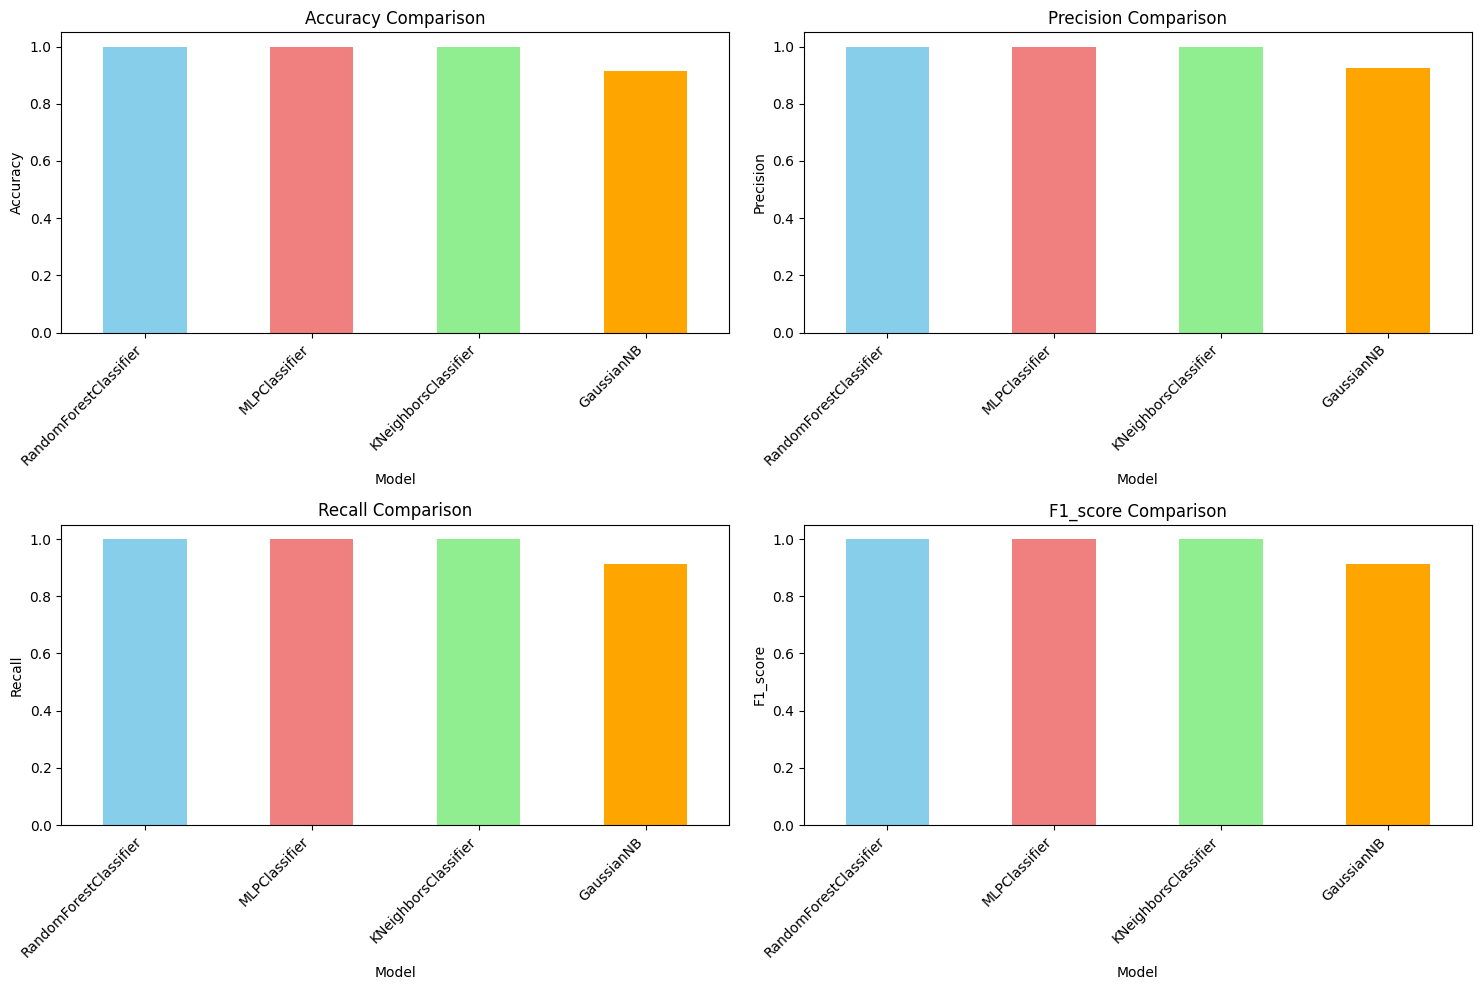

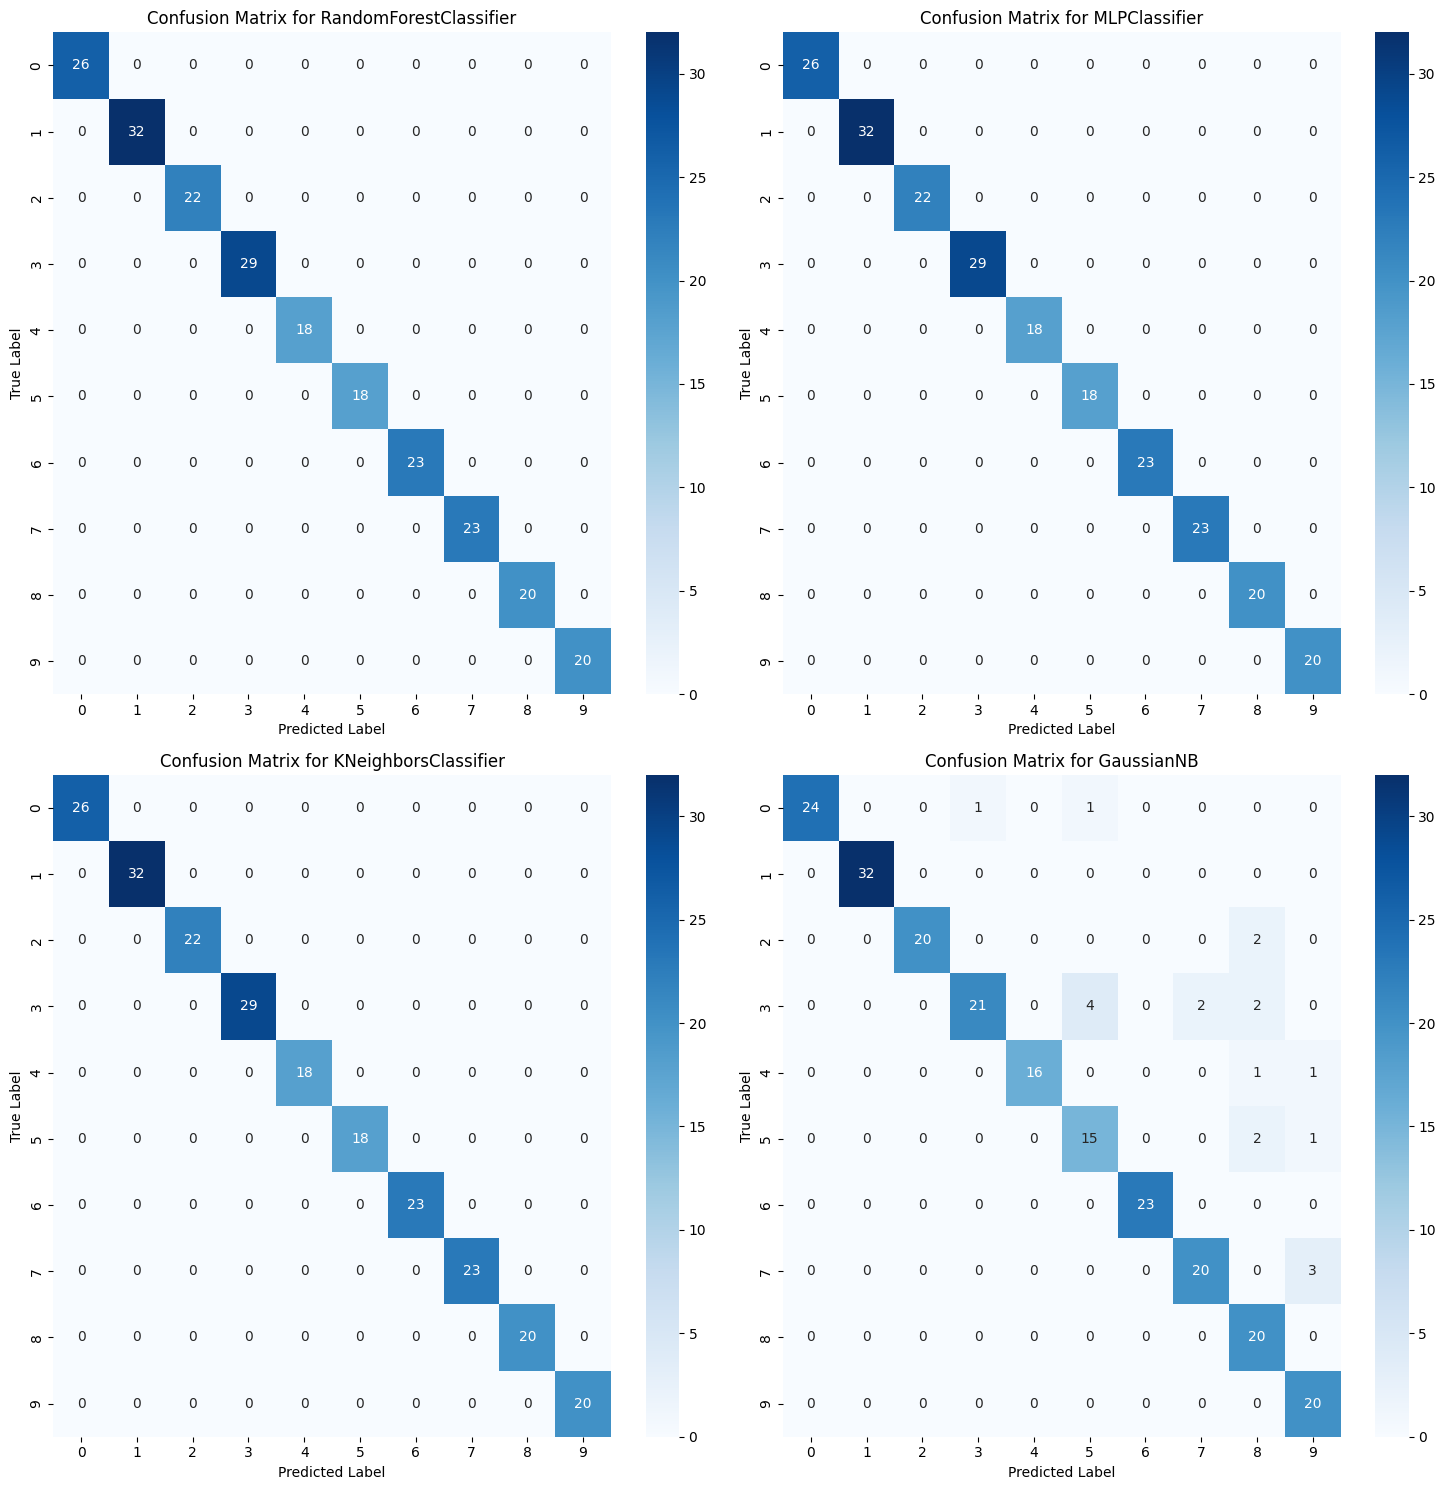

In [11]:

# Initialize an empty list to store results
import seaborn as sns

results = []

for model_name, model in best_models.items():
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test_imputed, y_pred)
    report = classification_report(y_test_imputed, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test_imputed, y_pred)

    # Append the results to the list
    results.append([model_name, accuracy, report['weighted avg']['precision'],
                    report['weighted avg']['recall'], report['weighted avg']['f1-score'], conf_matrix])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Model', 'accuracy', 'precision', 'recall', 'f1_score', 'confusion_matrix'])
results_df.set_index('Model', inplace=True)

# Plotting performance metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
for i, metric in enumerate(metrics):
    results_df[metric].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
    axes[i].set_title(f'{metric.capitalize()} Comparison')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_xticklabels(results_df.index, rotation=45, ha='right')
plt.tight_layout()
plt.savefig('performance_metrics.png')
plt.show()

# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# Convert axes to a 1-dimensional array
axes = axes.ravel()
for i, (model_name, row) in enumerate(results_df.iterrows()):
    if i < len(axes):  # Check if i is within the bounds of axes
        conf_matrix = row['confusion_matrix']
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {model_name}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    else:
        break  # Stop plotting if we run out of subplots

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()